### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\saman\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\saman\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
complaints_airport = pd.read_csv('complaints-by-airport.csv')
complaints_subcat = pd.read_csv('complaints-by-subcategory.csv')
iata_icao = pd.read_csv('iata-icao.csv')
complaints_cat = pd.read_csv('complaints-by-category.csv')

### By Airport

In [3]:
complaints_airport.head()

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2


In [4]:
complaints_airport['count'].value_counts()

count
0       14812
1        7167
2        3679
3        2263
4        1463
        ...  
382         1
343         1
444         1
404         1
3316        1
Name: count, Length: 529, dtype: int64

In [5]:
complaints_airport_over_100 = complaints_airport[complaints_airport['count'] >100]

In [6]:
over_100_airports = complaints_airport_over_100['airport'].value_counts().reset_index()

In [7]:
over_100_airports_list = over_100_airports['airport'].tolist()

In [8]:
complaints_airport_over_10 = complaints_airport[complaints_airport['count'] >10]

In [9]:
over_10_airports = complaints_airport_over_10['airport'].value_counts().reset_index()

In [10]:
over_10_airports_list = over_10_airports['airport'].tolist()

In [11]:
complaints_airport_under_10 = complaints_airport[complaints_airport['count'] <10]

In [12]:
under_10_airports = complaints_airport_under_10['airport'].value_counts().reset_index()

In [14]:
under_10_airports_list = under_10_airports['airport'].tolist()

In [15]:
overlap = set(under_10_airports_list).intersection(over_10_airports_list)

In [16]:
best_airports = under_10_airports[under_10_airports.airport.isin(overlap) == False]

In [17]:
best_airports

,airport,count
0,SBY,109
1,SUN,109
2,SGU,109
3,HXD,109
4,BRD,109
...,...,...
413,SLE,4
415,WRL,3
417,AHN,3
419,JRB,3


In [18]:
best_airports = best_airports[best_airports['count'] >100]

In [19]:
best_airports

,airport,count
0,SBY,109
1,SUN,109
2,SGU,109
3,HXD,109
4,BRD,109
...,...,...
155,GCK,104
160,RKS,104
161,PUB,104
162,PAH,104


In [20]:
fewest_complaints = complaints_airport_under_10[complaints_airport_under_10.airport.isin(overlap) == False]

In [21]:
fewest_complaints

,pdf_report_date,airport,year_month,count
109,2019-02,ABI,2015-01,2
110,2019-02,ABI,2015-02,1
111,2019-02,ABI,2015-03,0
112,2019-02,ABI,2015-04,3
113,2019-02,ABI,2015-05,2
...,...,...,...,...
41607,2019-02,YNG,2015-08,3
41608,2019-02,YNG,2015-09,3
41609,2019-02,YNG,2015-10,4
41610,2019-02,YNG,2015-11,2


### By Category

In [22]:
complaints_cat.head()

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
0,2019-02,ABE,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original
1,2019-02,ABE,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original
2,2019-02,ABE,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original
3,2019-02,ABE,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original
4,2019-02,ABE,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original


In [23]:
complaints_cat['clean_cat'].value_counts()

clean_cat
Mishandling of Passenger Property                           31212
Screening                                                   29134
Customer Service                                            28414
Property - Special Handling                                 22072
Patdown                                                     21405
Civil Rights                                                18618
Persons w/ Disabilities (PWD)                               18522
Locks                                                       16738
Expedited Passenger Screening Program                       14671
Lost and Found                                               7441
Identification (ID) Requirements                             3974
Prohibited & Permitted Items                                 3927
No Jurisdiction                                              3705
Airline                                                      3326
Request for Assistance                                       2956


In [24]:
complaints_cat_wo_na_airports = complaints_cat.dropna()

In [25]:
complaints_cat_wo_na_airports.sort_values(by=['count'], ascending=False)

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
72513,2024-02,EWR,Expedited Passenger Screening Program,2022-03,582,Expedited Passenger Screening Program,original
72534,2024-02,EWR,Expedited Passenger Screening Program,2022-04,567,Expedited Passenger Screening Program,original
72899,2024-02,EWR,Expedited Passenger Screening Program,2023-10,535,Expedited Passenger Screening Program,original
72555,2024-02,EWR,Expedited Passenger Screening Program,2022-05,495,Expedited Passenger Screening Program,original
72760,2024-02,EWR,Expedited Passenger Screening Program,2023-03,489,Expedited Passenger Screening Program,original
...,...,...,...,...,...,...,...
95418,2024-02,HNL,Additional Information Required/Insufficient I...,2023-07,0,Additional Information Required/Insufficient I...,original
95419,2024-02,HNL,Airline,2023-07,0,Airline,original
95421,2024-02,HNL,Claims,2023-07,0,Claims,original
95424,2024-02,HNL,Locks,2023-07,0,Locks,original


In [76]:
complaints_cat_wo_na_airports.sort_values(by=['count'], ascending=False)

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
72513,2024-02,EWR,Expedited Passenger Screening Program,2022-03,582,Expedited Passenger Screening Program,original
72534,2024-02,EWR,Expedited Passenger Screening Program,2022-04,567,Expedited Passenger Screening Program,original
72899,2024-02,EWR,Expedited Passenger Screening Program,2023-10,535,Expedited Passenger Screening Program,original
72555,2024-02,EWR,Expedited Passenger Screening Program,2022-05,495,Expedited Passenger Screening Program,original
72760,2024-02,EWR,Expedited Passenger Screening Program,2023-03,489,Expedited Passenger Screening Program,original
...,...,...,...,...,...,...,...
95418,2024-02,HNL,Additional Information Required/Insufficient I...,2023-07,0,Additional Information Required/Insufficient I...,original
95419,2024-02,HNL,Airline,2023-07,0,Airline,original
95421,2024-02,HNL,Claims,2023-07,0,Claims,original
95424,2024-02,HNL,Locks,2023-07,0,Locks,original


In [27]:
complaints_cat_disability = complaints_cat_wo_na_airports[complaints_cat_wo_na_airports[
    'clean_cat'].isin(['Persons w/ Disabilities (PWD)'])]

In [28]:
complaints_cat_disability

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
239,2021-06,ABE,Persons w/ Disabilities (PWD),2018-10,0,Persons w/ Disabilities (PWD),original
247,2021-06,ABE,Persons w/ Disabilities (PWD),2018-11,0,Persons w/ Disabilities (PWD),original
255,2021-06,ABE,Persons w/ Disabilities (PWD),2018-12,0,Persons w/ Disabilities (PWD),original
263,2022-05,ABE,Persons w/ Disabilities (PWD),2019-01,0,Persons w/ Disabilities (PWD),original
271,2022-05,ABE,Persons w/ Disabilities (PWD),2019-02,0,Persons w/ Disabilities (PWD),original
...,...,...,...,...,...,...,...
237455,2023-05,YKM,Persons w/ Disabilities (PWD),2021-07,0,Persons w/ Disabilities (PWD),original
237459,2023-05,YKM,Persons w/ Disabilities (PWD),2021-08,0,Persons w/ Disabilities (PWD),original
237536,2019-02,YNG,Persons w/ Disabilities (PWD),2015-10,1,Persons w/ Disabilities (PWD),original
237540,2019-02,YNG,Persons w/ Disabilities (PWD),2015-11,0,Persons w/ Disabilities (PWD),original


In [29]:
complaints_cat_disability = complaints_cat_disability[complaints_cat_disability['count'] != 0]

In [30]:
complaints_cat_disability['airport'].value_counts()

airport
LAX    107
DEN    106
MCO    104
ATL    103
JFK    102
      ... 
LEB      1
LCH      1
LAR      1
JHM      1
YNG      1
Name: count, Length: 333, dtype: int64

### By Subcategory

In [31]:
complaints_subcat.head()

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


In [32]:
complaints_subcat['clean_subcat'].value_counts()

clean_subcat
TSO                                         27987
Procedures/Process                          26839
General                                     20721
*Damaged/Missing Items--Checked Baggage     19631
Flyer                                       18742
                                            ...  
Newspaper, Radio, TV Representatives           15
Knitting/Crochet Hooks/Needles                 15
Transfer to Ombudsman                          12
Crewmember Self Defense Training (CMSDT)       12
Wage Garnishment                               12
Name: count, Length: 146, dtype: int64

In [33]:
complaints_subcat_wo_na_airports = complaints_subcat.dropna()

In [34]:
complaints_subcat_wo_na_airports.sort_values(by=['count'], ascending=False)

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
149044,2024-02,EWR,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2022-03,568,Expedited Passenger Screening Program,*,original,ambiguous,True
149126,2024-02,EWR,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2022-04,548,Expedited Passenger Screening Program,*,original,ambiguous,True
150424,2024-02,EWR,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2023-10,528,Expedited Passenger Screening Program,*,original,ambiguous,True
149956,2024-02,EWR,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2023-03,481,Expedited Passenger Screening Program,*,original,ambiguous,True
149208,2024-02,EWR,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2022-05,469,Expedited Passenger Screening Program,*,original,ambiguous,True
...,...,...,...,...,...,...,...,...,...,...,...
187942,2023-05,HNL,Property - Special Handling,Property - Special Handling - Damaged Items - ...,2020-12,0,Property - Special Handling,*Damaged Items - Checked,original,imputed,True
187941,2023-05,HNL,Property - Special Handling,Property - Special Handling - Damaged Items - ...,2020-12,0,Property - Special Handling,*Damaged Items - Carry-On,original,original,True
187939,2023-05,HNL,Prohibited & Permitted Items,Prohibited & Permitted Items - Knives/Tools/Ra...,2020-12,0,Prohibited & Permitted Items,Knives/Tools/Razors/Sharp Objects,original,original,True
187938,2023-05,HNL,Prohibited & Permitted Items,Prohibited & Permitted Items - Food/Beverages,2020-12,0,Prohibited & Permitted Items,Food/Beverages,original,original,True


In [35]:
complaints_subcat_disability = complaints_subcat_wo_na_airports[
    complaints_subcat_wo_na_airports['clean_cat'].isin(['Persons w/ Disabilities (PWD)'])]

In [36]:
complaints_subcat_disability = complaints_subcat_disability[complaints_subcat_disability['count'] != 0]

In [37]:
complaints_subcat_disability[['airport','clean_subcat']].value_counts()

airport  clean_subcat                                       
MCO      Medically Necessary Medication and Medical Supplies    71
LAS      Wheelchair/ Scooter/ Segway                            68
MCO      Wheelchair/ Scooter/ Segway                            68
LAX      Medically Necessary Medication and Medical Supplies    63
DEN      Wheelchair/ Scooter/ Segway                            62
                                                                ..
ITO      Diabetes                                                1
         Cognitive /Developmental /Mental Disability             1
ITH      Mobility Disability (Not Wheelchair or Scooter)         1
ISP      Wheelchair/ Scooter/ Segway                             1
YNG      Metal Implants (joint)                                  1
Name: count, Length: 2570, dtype: int64

In [38]:
complaints_subcat_disability = complaints_subcat_disability[['airport', 'year_month', 'count', 'clean_subcat']]

In [39]:
complaints_subcat_disability

,airport,year_month,count,clean_subcat
470,ABE,2019-05,2,Mobility Disability (Not Wheelchair or Scooter)
511,ABE,2019-08,1,Medically Necessary Medication and Medical Sup...
712,ABE,2021-06,1,Medical Devices - Attached to the Body
723,ABE,2021-07,1,Medically Necessary Medication and Medical Sup...
901,ABE,2022-09,1,Diabetes
...,...,...,...,...
490730,YKM,2018-08,1,Mobility Disability (Not Wheelchair or Scooter)
490773,YKM,2019-03,1,Prosthesis/Amputees and Casts
490918,YKM,2021-06,1,Cognitive /Developmental /Mental Disability
490919,YKM,2021-06,1,Medically Necessary Medication and Medical Sup...


In [40]:
complaints_subcat_disability['count'].sum()

16537

In [41]:
subcat_counts = complaints_subcat_disability['clean_subcat'].value_counts().reset_index()

In [135]:
subcat_counts['clean_subcat'].to_list()

['Wheelchair/ Scooter/ Segway',
 'Mobility Disability (Not Wheelchair or Scooter)',
 'Medically Necessary Medication and Medical Supplies',
 'Diabetes',
 'General',
 'Metal Implants (joint)',
 'Prosthesis/Amputees and Casts',
 'Touch Aversion (pain/trauma)',
 'Cognitive /Developmental /Mental Disability',
 'Internal Medical Devices',
 'Autism Spectrum',
 'Medical Devices - Attached to the Body',
 'Service Animals',
 'Hearing Impairment',
 'Cancer (general) Not Breast Cancer',
 'Ostomy/Ostomates',
 'Respiratory and Inhaler Equipment',
 'Breast Cancer',
 'Visual Impairment',
 'Diapers/Garments/Dressings/Masks',
 'Wounded Warrior',
 'Assistive Technology']

In [42]:
complaints_subcat_disability = complaints_subcat_disability.rename(columns={'airport': 'iata'})

### Airport Info

In [43]:
iata_icao.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477


In [44]:
unique_airports = len(pd.unique(iata_icao['iata']))

In [45]:
unique_airports = str(unique_airports)

In [46]:
print("Number of unique airports " + unique_airports)

Number of unique airports 8937


### Merged DF

In [109]:
complaints_subcat = complaints_subcat.rename(columns={'airport': 'iata'})

In [113]:
region_complaints = pd.merge(complaints_subcat, iata_icao, on="iata")

In [115]:
region_complaints = region_complaints[region_complaints['count'] >100]

In [116]:
region_complaints

,pdf_report_date,iata,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed,country_code,region_name,icao,airport,latitude,longitude
23104,2024-02,ATL,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2021-10,112,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Georgia,KATL,Hartsfield-Jackson Atlanta International Airport,33.6367,-84.4281
23178,2024-02,ATL,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2021-11,154,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Georgia,KATL,Hartsfield-Jackson Atlanta International Airport,33.6367,-84.4281
23252,2024-02,ATL,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2021-12,183,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Georgia,KATL,Hartsfield-Jackson Atlanta International Airport,33.6367,-84.4281
23326,2024-02,ATL,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2022-01,133,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Georgia,KATL,Hartsfield-Jackson Atlanta International Airport,33.6367,-84.4281
23400,2024-02,ATL,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2022-02,176,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Georgia,KATL,Hartsfield-Jackson Atlanta International Airport,33.6367,-84.4281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473960,2024-02,TPA,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2023-05,147,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Florida,KTPA,Tampa International Airport,27.9755,-82.5332
474011,2024-02,TPA,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2023-06,121,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Florida,KTPA,Tampa International Airport,27.9755,-82.5332
474164,2024-02,TPA,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2023-09,108,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Florida,KTPA,Tampa International Airport,27.9755,-82.5332
474210,2024-02,TPA,Expedited Passenger Screening Program,Expedited Passenger Screening Program,2023-10,155,Expedited Passenger Screening Program,*,original,ambiguous,True,US,Florida,KTPA,Tampa International Airport,27.9755,-82.5332


In [47]:
disability_complaints = pd.merge(complaints_subcat_disability, iata_icao, on="iata")

In [48]:
disability_complaints

,iata,year_month,count,clean_subcat,country_code,region_name,icao,airport,latitude,longitude
0,ABE,2019-05,2,Mobility Disability (Not Wheelchair or Scooter),US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
1,ABE,2019-08,1,Medically Necessary Medication and Medical Sup...,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
2,ABE,2021-06,1,Medical Devices - Attached to the Body,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
3,ABE,2021-07,1,Medically Necessary Medication and Medical Sup...,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
4,ABE,2022-09,1,Diabetes,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
...,...,...,...,...,...,...,...,...,...,...
13990,YKM,2018-08,1,Mobility Disability (Not Wheelchair or Scooter),US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13991,YKM,2019-03,1,Prosthesis/Amputees and Casts,US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13992,YKM,2021-06,1,Cognitive /Developmental /Mental Disability,US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13993,YKM,2021-06,1,Medically Necessary Medication and Medical Sup...,US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440


In [49]:
disability_complaints['region_name'].value_counts()

region_name
Florida                 1887
California              1525
Texas                   1219
New York                 885
Colorado                 537
Illinois                 530
Virginia                 514
Nevada                   470
Arizona                  460
New Jersey               445
Washington               440
Georgia                  428
North Carolina           403
Pennsylvania             357
Massachusetts            334
Hawaii                   267
Maryland                 263
Michigan                 259
Minnesota                233
Ohio                     226
Missouri                 222
Oregon                   199
Louisiana                194
Tennessee                182
Utah                     144
South Carolina           132
Alaska                   126
Indiana                   94
Connecticut               91
Kentucky                  81
Iowa                      80
Carolina                  75
New Mexico                74
Oklahoma                  66
Wi

In [50]:
disability_complaints = disability_complaints[disability_complaints.country_code.isin(['US'])]

In [51]:
disability_complaints

,iata,year_month,count,clean_subcat,country_code,region_name,icao,airport,latitude,longitude
0,ABE,2019-05,2,Mobility Disability (Not Wheelchair or Scooter),US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
1,ABE,2019-08,1,Medically Necessary Medication and Medical Sup...,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
2,ABE,2021-06,1,Medical Devices - Attached to the Body,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
3,ABE,2021-07,1,Medically Necessary Medication and Medical Sup...,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
4,ABE,2022-09,1,Diabetes,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408
...,...,...,...,...,...,...,...,...,...,...
13990,YKM,2018-08,1,Mobility Disability (Not Wheelchair or Scooter),US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13991,YKM,2019-03,1,Prosthesis/Amputees and Casts,US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13992,YKM,2021-06,1,Cognitive /Developmental /Mental Disability,US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13993,YKM,2021-06,1,Medically Necessary Medication and Medical Sup...,US,Washington,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440


In [52]:
disability_complaints = disability_complaints.replace({
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
    })

In [53]:
disability_complaints

,iata,year_month,count,clean_subcat,country_code,region_name,icao,airport,latitude,longitude
0,ABE,2019-05,2,Mobility Disability (Not Wheelchair or Scooter),US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
1,ABE,2019-08,1,Medically Necessary Medication and Medical Sup...,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
2,ABE,2021-06,1,Medical Devices - Attached to the Body,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
3,ABE,2021-07,1,Medically Necessary Medication and Medical Sup...,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
4,ABE,2022-09,1,Diabetes,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
...,...,...,...,...,...,...,...,...,...,...
13990,YKM,2018-08,1,Mobility Disability (Not Wheelchair or Scooter),US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13991,YKM,2019-03,1,Prosthesis/Amputees and Casts,US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13992,YKM,2021-06,1,Cognitive /Developmental /Mental Disability,US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13993,YKM,2021-06,1,Medically Necessary Medication and Medical Sup...,US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440


In [54]:
disability_complaints = disability_complaints.rename(columns={'region_name': 'state'})

In [55]:
disability_complaints

,iata,year_month,count,clean_subcat,country_code,state,icao,airport,latitude,longitude
0,ABE,2019-05,2,Mobility Disability (Not Wheelchair or Scooter),US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
1,ABE,2019-08,1,Medically Necessary Medication and Medical Sup...,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
2,ABE,2021-06,1,Medical Devices - Attached to the Body,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
3,ABE,2021-07,1,Medically Necessary Medication and Medical Sup...,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
4,ABE,2022-09,1,Diabetes,US,PA,KABE,Lehigh Valley International Airport,40.6521,-75.4408
...,...,...,...,...,...,...,...,...,...,...
13990,YKM,2018-08,1,Mobility Disability (Not Wheelchair or Scooter),US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13991,YKM,2019-03,1,Prosthesis/Amputees and Casts,US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13992,YKM,2021-06,1,Cognitive /Developmental /Mental Disability,US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440
13993,YKM,2021-06,1,Medically Necessary Medication and Medical Sup...,US,WA,KYKM,Yakima Air Terminal (McAllister Field),46.5682,-120.5440


In [56]:
state_totals = disability_complaints.groupby('state')['count'].sum().reset_index()

In [57]:
state_totals_df = df = pd.DataFrame(state_totals, columns=["state", "count"])

In [107]:
import plotly.express as px
fig = px.choropleth(state_totals_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='count', 
                    
                    )
fig.show()

In [59]:
disability_complaints['year_month'] = pd.to_datetime(disability_complaints['year_month'])

In [60]:
disability_complaints['year'] = pd.DatetimeIndex(disability_complaints['year_month']).year
disability_complaints['month'] = pd.DatetimeIndex(disability_complaints['year_month']).month

In [104]:
year_month = disability_complaints['year_month']
year = disability_complaints['year']
month = disability_complaints['month']
count = disability_complaints.groupby('month')['count'].sum()

<AxesSubplot:xlabel='month', ylabel='count'>

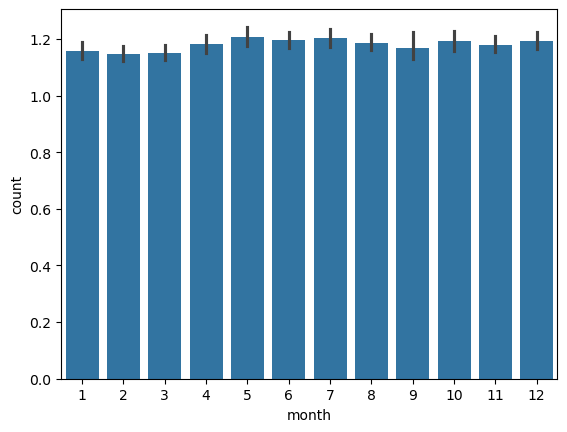

In [139]:
import seaborn as sns
sns.barplot(data=disability_complaints, x='month', y='count')

<AxesSubplot:xlabel='year', ylabel='count'>

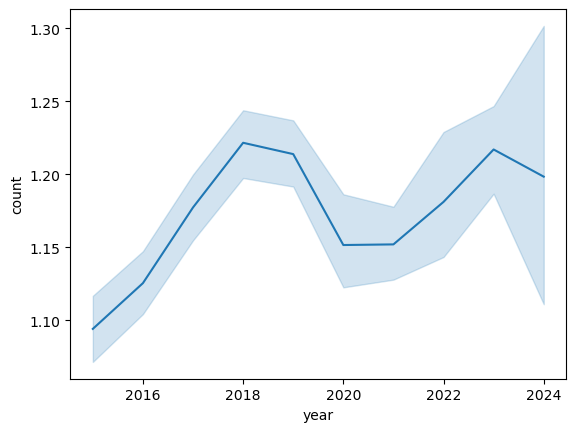

In [106]:
sns.lineplot(data=disability_complaints, x='year', y='count')

In [68]:
by_disability = subcat_counts[subcat_counts['clean_subcat'].isin(['Wheelchair/ Scooter/ Segway', 
                                                                              'Mobility Disability (Not Wheelchair or Scooter)', 
                                                                              'Cognitive /Developmental /Mental Disability',
                                                                              'Hearing Impairment', 'Visual Impairment'])]

In [69]:
by_disability['clean_subcat'] = by_disability['clean_subcat'].replace({'Wheelchair/ Scooter/ Segway': 'Wheelchair, etc.',
                                                       'Mobility Disability (Not Wheelchair or Scooter)': 'Mobility-Other',
                                                       'Cognitive /Developmental /Mental Disability': 'Cognitive',
                                                       'Hearing Impairment': 'Deaf', 'Visual Impairment': 'Blind'})

C:\Users\saman\AppData\Local\Temp\ipykernel_11572\3306839431.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
disability_complaints.sort_values(by=['count'], ascending=False)

,iata,year_month,count,clean_subcat,country_code,state,icao,airport,latitude,longitude,year,month
9620,OGG,2022-09-01,23,Metal Implants (joint),US,HI,PHOG,Kahului Airport,20.8986,-156.4300,2022,9
9622,OGG,2022-10-01,14,Metal Implants (joint),US,HI,PHOG,Kahului Airport,20.8986,-156.4300,2022,10
8258,MCO,2022-05-01,10,Medically Necessary Medication and Medical Sup...,US,FL,KMCO,Orlando International Airport,28.4294,-81.3090,2022,5
7932,MCO,2017-10-01,8,Wheelchair/ Scooter/ Segway,US,FL,KMCO,Orlando International Airport,28.4294,-81.3090,2017,10
8344,MCO,2023-06-01,7,Medically Necessary Medication and Medical Sup...,US,FL,KMCO,Orlando International Airport,28.4294,-81.3090,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4973,GSO,2019-11-01,1,Hearing Impairment,US,NC,KGSO,Piedmont Triad International Airport,36.0978,-79.9373,2019,11
4974,GSO,2019-11-01,1,Mobility Disability (Not Wheelchair or Scooter),US,NC,KGSO,Piedmont Triad International Airport,36.0978,-79.9373,2019,11
4975,GSO,2020-03-01,1,Diabetes,US,NC,KGSO,Piedmont Triad International Airport,36.0978,-79.9373,2020,3
4976,GSO,2020-03-01,1,Mobility Disability (Not Wheelchair or Scooter),US,NC,KGSO,Piedmont Triad International Airport,36.0978,-79.9373,2020,3


<AxesSubplot:xlabel='count', ylabel='region_name'>

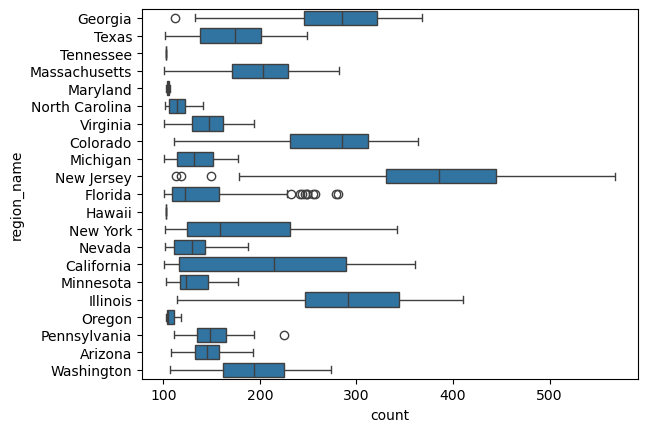

In [117]:
sns.boxplot(data=region_complaints, x="count", y="region_name")


<AxesSubplot:xlabel='Count', ylabel='clean_subcat'>

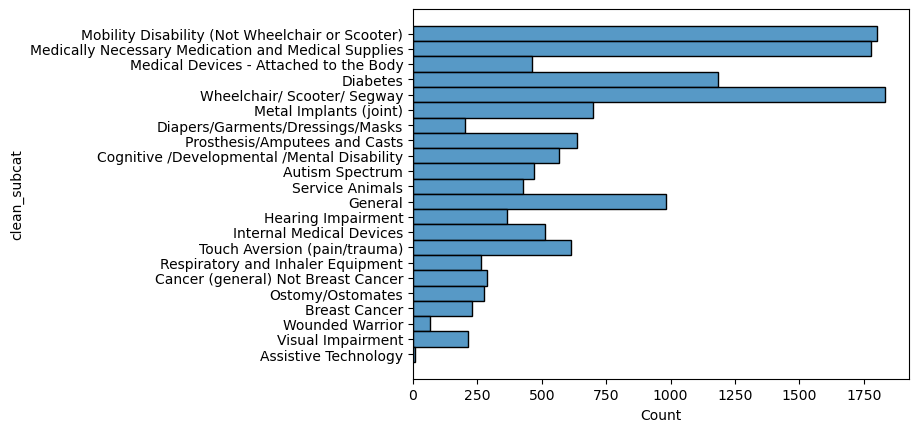

In [118]:
sns.histplot(data=disability_complaints, y="clean_subcat")

In [127]:
disability_complaints_ltd = disability_complaints[disability_complaints['state'].isin(['TX', 'CA', 'NY', 'FL'])]

In [128]:
disability_complaints_ltd = disability_complaints_ltd.sort_values('airport')

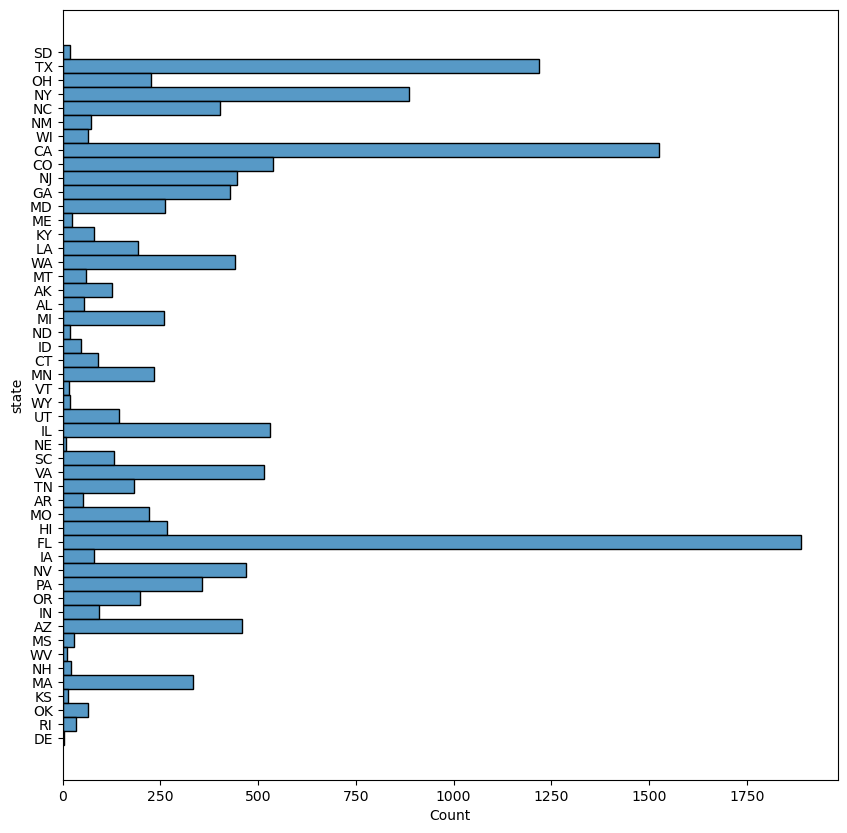

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=disability_complaints, y="state", ax=ax)
plt.show()

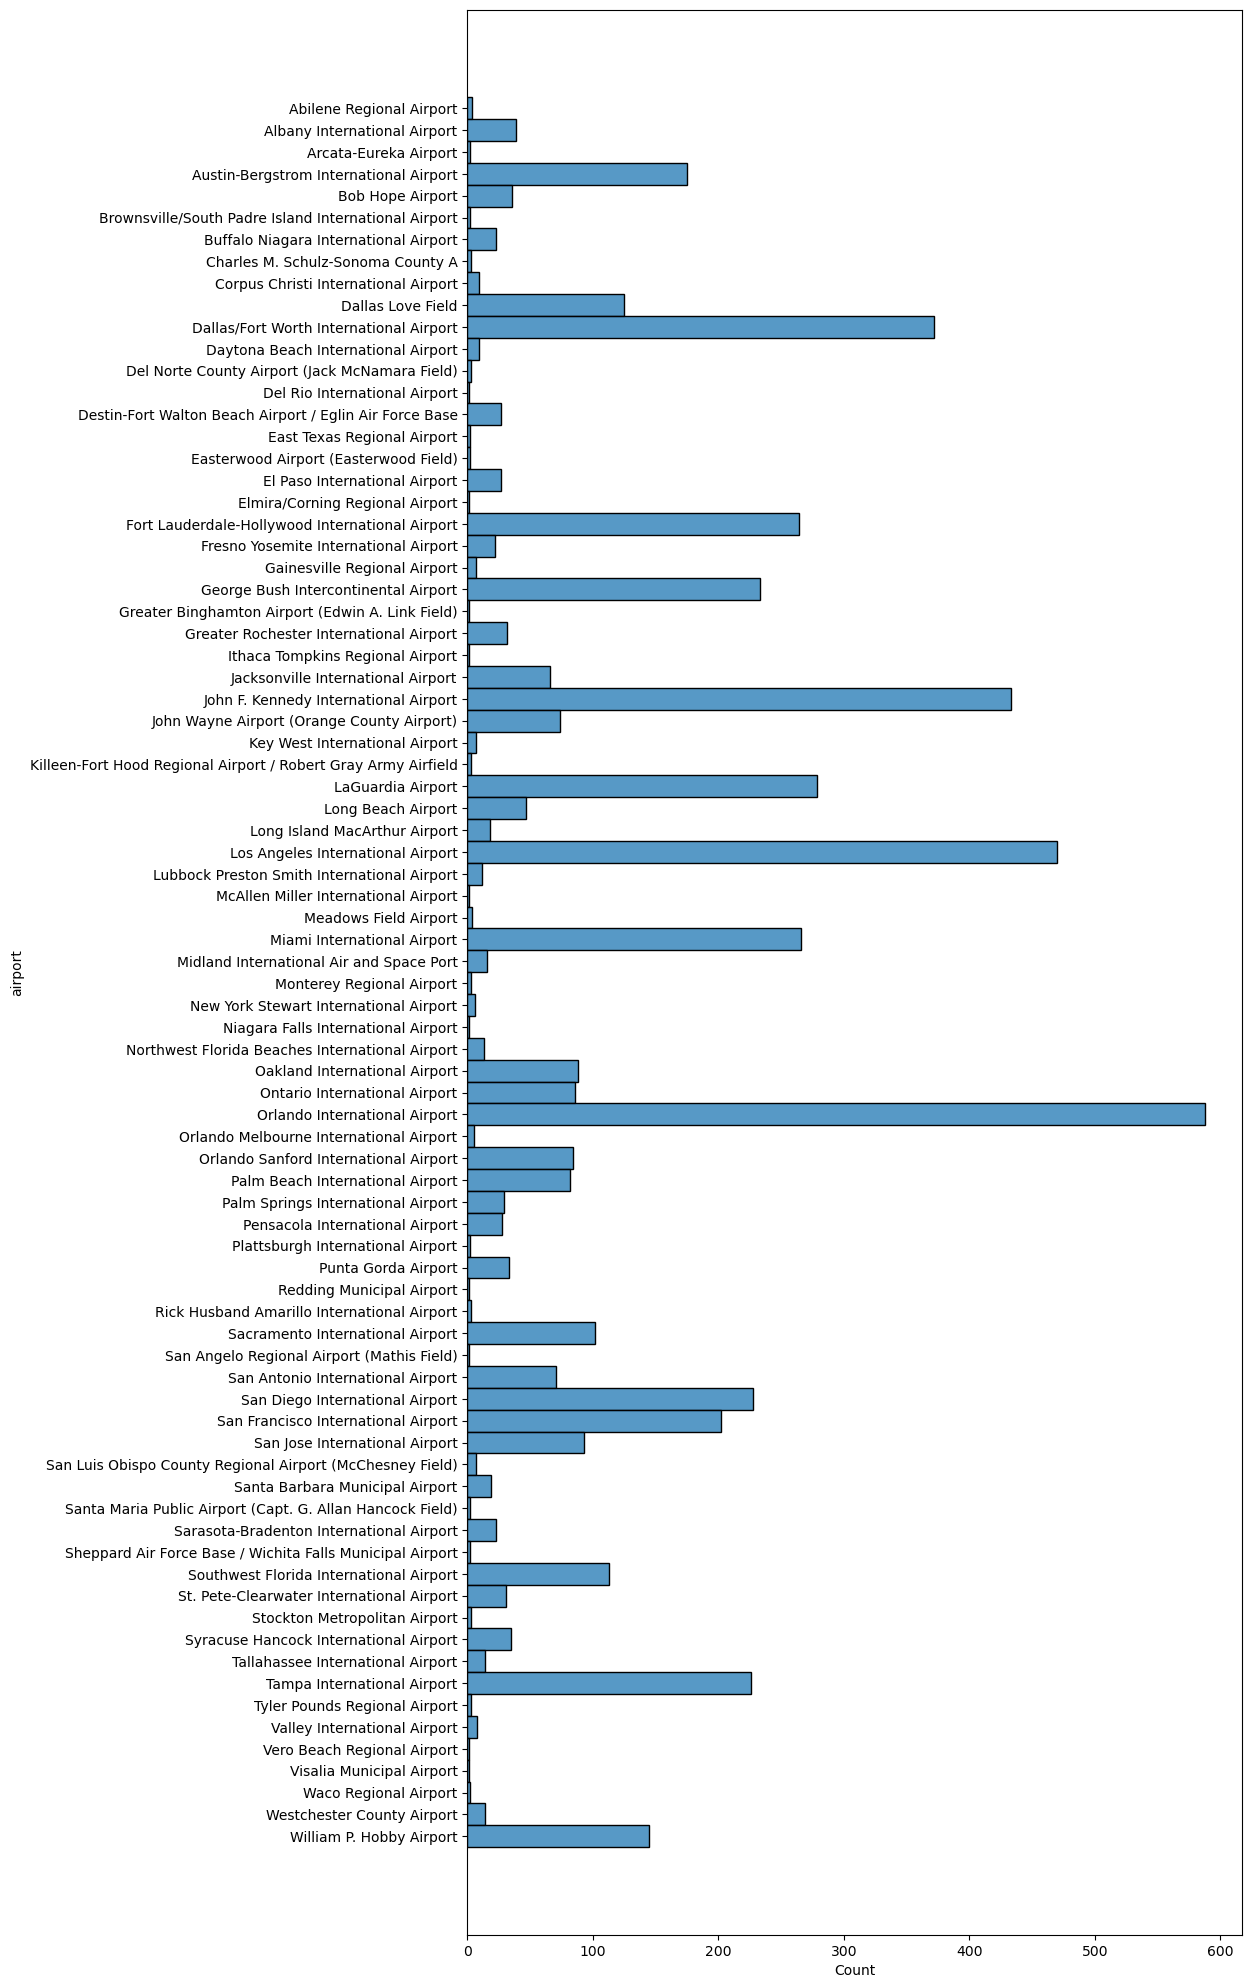

In [131]:
fig, ax = plt.subplots(figsize=(10, 25))
sns.histplot(data=disability_complaints_ltd, y="airport", ax=ax)
plt.show()